In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns",None)

In [3]:
df = pd.read_csv("../Dataset/gurgaon_properties_cleaned_v2.csv")

In [4]:
df.duplicated().sum()

126

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ardee city,sector 52,1.55,7381.0,2100.0,Built Up area: 2100 (195.1 sq.m.)Carpet area: ...,4,4,3,1.0,NaN,Moderately Old,NaN,2100.0,1600.0,0,0,0,0,0,1,0
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,10.0,NaN,Relatively New,NaN,NaN,520.0,0,0,0,0,0,1,15
2,flat,mvn athens,sohna road,0.26,5397.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2,2,1,5.0,NaN,Relatively New,NaN,NaN,482.0,0,0,0,0,0,1,95
3,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3,5,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,0,1,0,0,0,1,72
4,flat,parsvnath exotica,sector 53,4.80,16580.0,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up...,3,4,3+,8.0,North-East,Relatively New,2895.0,2500.0,2200.0,0,1,0,1,1,2,174


## Property_type

In [7]:
df["property_type"].value_counts()

property_type
flat     2818
house     859
Name: count, dtype: int64

In [8]:
df["property_type"].isnull().sum()

0

<Axes: xlabel='property_type'>

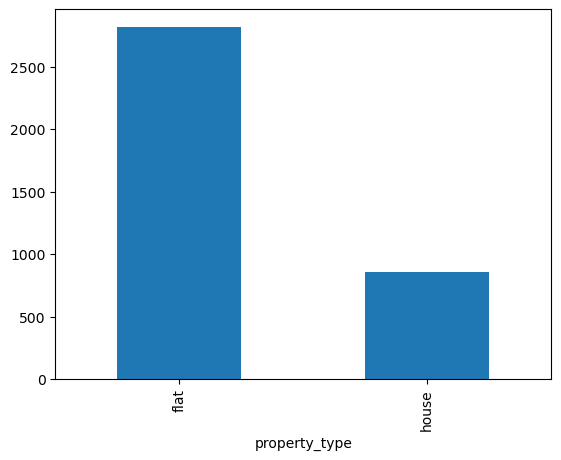

In [9]:
df["property_type"].value_counts().plot(kind="bar")

Observation
* 75% data is on flat
* There is no missing value

## society

In [10]:
df['society'].isnull().sum()

1

In [11]:
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
m3m antalya hills                         1
the serenas                               1
the laburnum                              1
huda floor                                1
bhawani enclave                           1
Name: count, Length: 676, dtype: int64

In [12]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).head(75)

society
tulip violet                            0.023511
ss the leaf                             0.022884
dlf new town heights                    0.013166
shapoorji pallonji joyville gurugram    0.013166
signature global park                   0.010972
                                          ...   
umang monsoon breeze                    0.004075
ansal heights 86                        0.004075
puri emerald bay                        0.004075
mvn athens                              0.003762
ireo the corridors                      0.003762
Name: proportion, Length: 75, dtype: float64

In [13]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
dlf new town heights                    0.059561
shapoorji pallonji joyville gurugram    0.072727
signature global park                   0.083699
                                          ...   
umang monsoon breeze                    0.490282
ansal heights 86                        0.494357
puri emerald bay                        0.498433
mvn athens                              0.502194
ireo the corridors                      0.505956
Name: proportion, Length: 75, dtype: float64

<Axes: xlabel='society'>

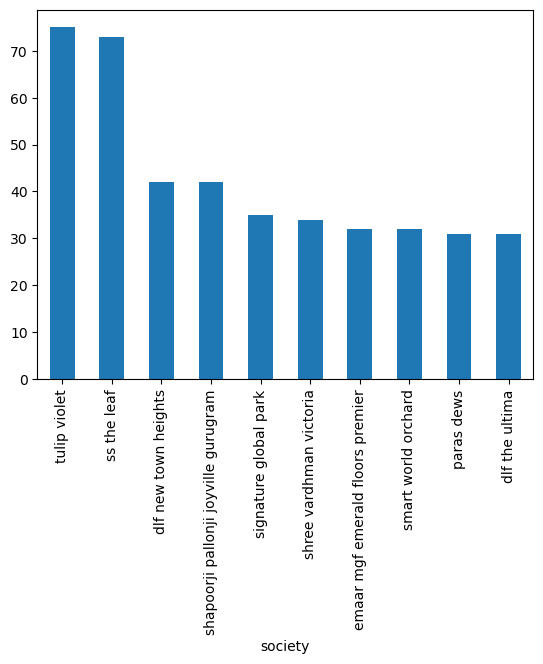

In [14]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [15]:
society_counts = df['society'].value_counts()

frequency_bin = {
    "Very High": (society_counts > 100).sum(),
    "High": ((society_counts >=50) & (society_counts < 100)).sum(),
    "Average": ((society_counts >=10) & (society_counts < 50)).sum(),
    "Low": ((society_counts >=2) & (society_counts < 10)).sum(),
    "Very Low": (society_counts == 1).sum()
}
frequency_bin

{'Very High': 1, 'High': 2, 'Average': 92, 'Low': 273, 'Very Low': 308}

Observation
* only 1 missing value
* 75 society has 50% of listing and rest 600 has other 50% listing 
* maximum society has only 1 listing
* there is 675 society


## sector

In [16]:
df['sector'].value_counts().shape

(115,)

In [17]:
df['sector'].isnull().sum()

0

<Axes: xlabel='sector'>

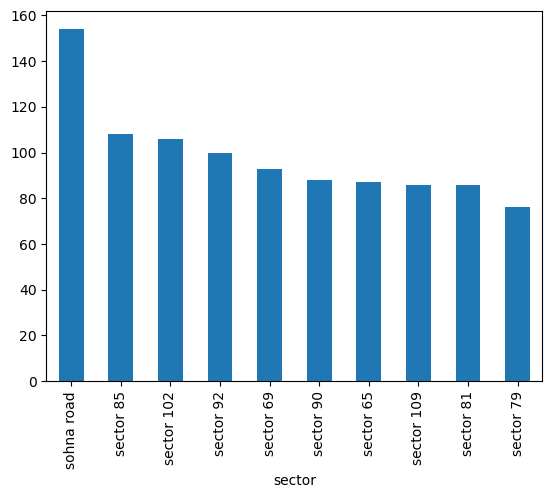

In [18]:
df['sector'].value_counts().head(10).plot(kind="bar")

In [19]:
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}
sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 23,
 'Very Low (1)': 1}

Observation
* there is too much sector 104 to be exact
* the count seems normal and surprise part is there is sector with 1 listing
* average part is preety good
* there is 0 missing value

In [20]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ardee city,sector 52,1.55,7381.0,2100.0,Built Up area: 2100 (195.1 sq.m.)Carpet area: ...,4,4,3,1.0,NaN,Moderately Old,NaN,2100.0,1600.0,0,0,0,0,0,1,0
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,10.0,NaN,Relatively New,NaN,NaN,520.0,0,0,0,0,0,1,15
2,flat,mvn athens,sohna road,0.26,5397.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2,2,1,5.0,NaN,Relatively New,NaN,NaN,482.0,0,0,0,0,0,1,95
3,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3,5,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,0,1,0,0,0,1,72
4,flat,parsvnath exotica,sector 53,4.80,16580.0,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up...,3,4,3+,8.0,North-East,Relatively New,2895.0,2500.0,2200.0,0,1,0,1,1,2,174


## price

In [21]:
df['price'].isnull().sum()

17

In [22]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

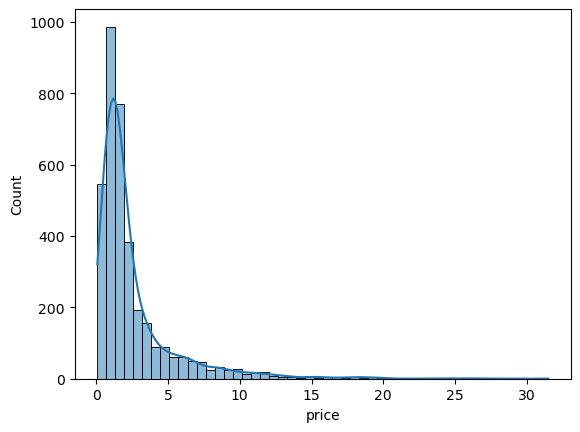

In [23]:
sns.histplot(df['price'], kde=True, bins=50)

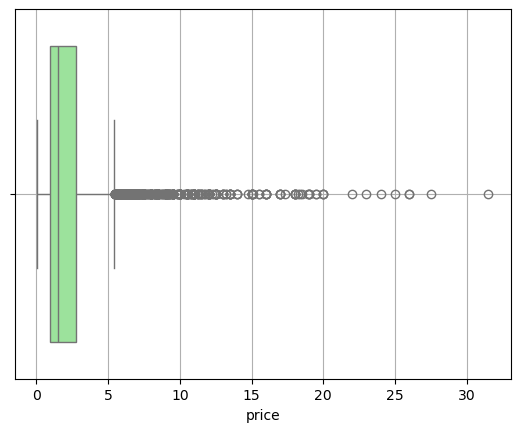

In [24]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

In [25]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.2791704733134615 14.933372629214254


In [26]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

In [27]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

print(IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

1.8
-1.7500000000000002 5.45


In [28]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [29]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Observation
* there is 17 null values
* data is right skewed and lot of outliers
* from histogram most of the property price is less than 5 cr
* median value is 1.52cr
* 95% property has below 8.5cr price
* minimum price is 70lakh and maximum is 31.5cr
* according to IQR 425 values are outlier

<Axes: xlabel='price'>

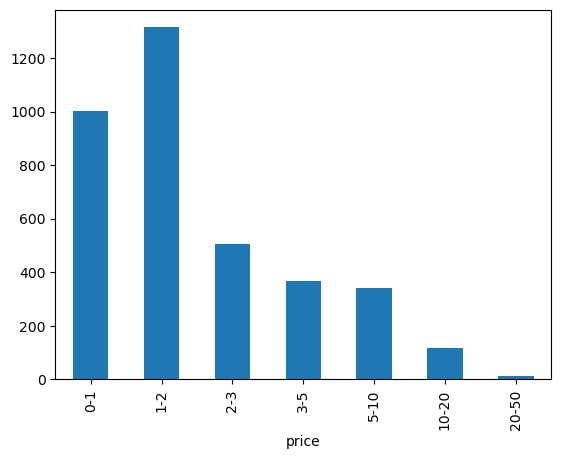

In [30]:
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

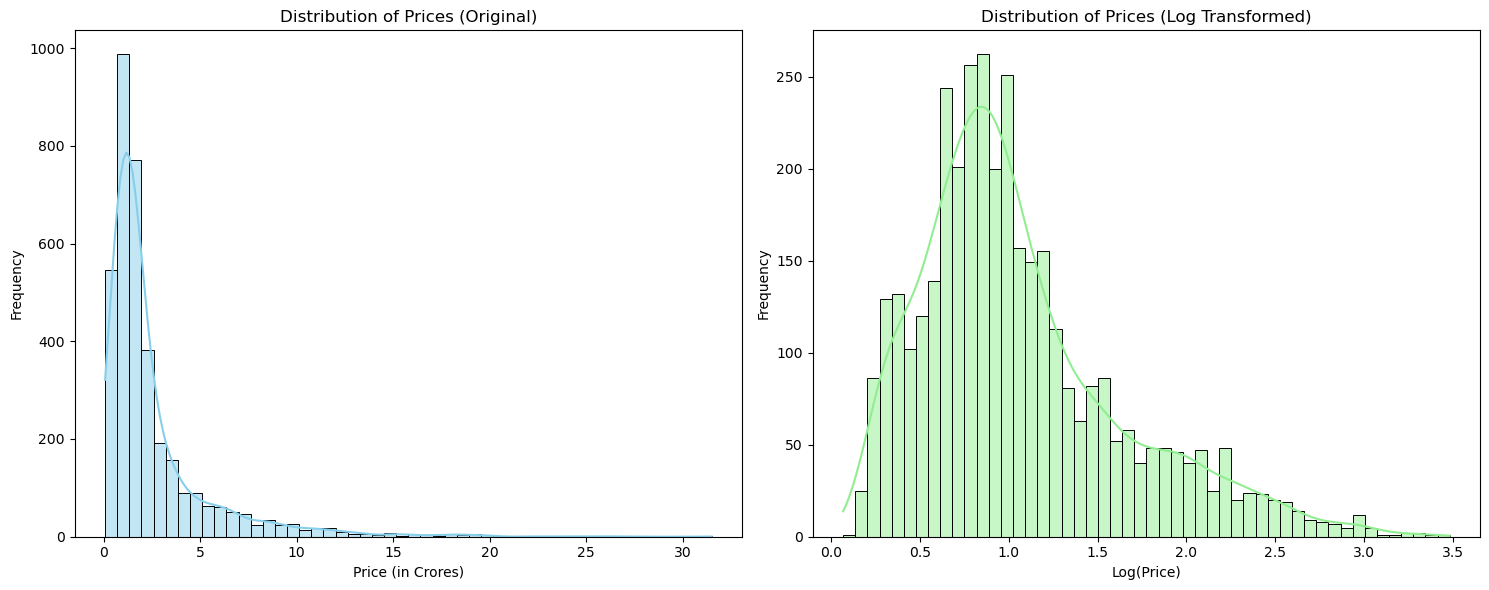

In [31]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

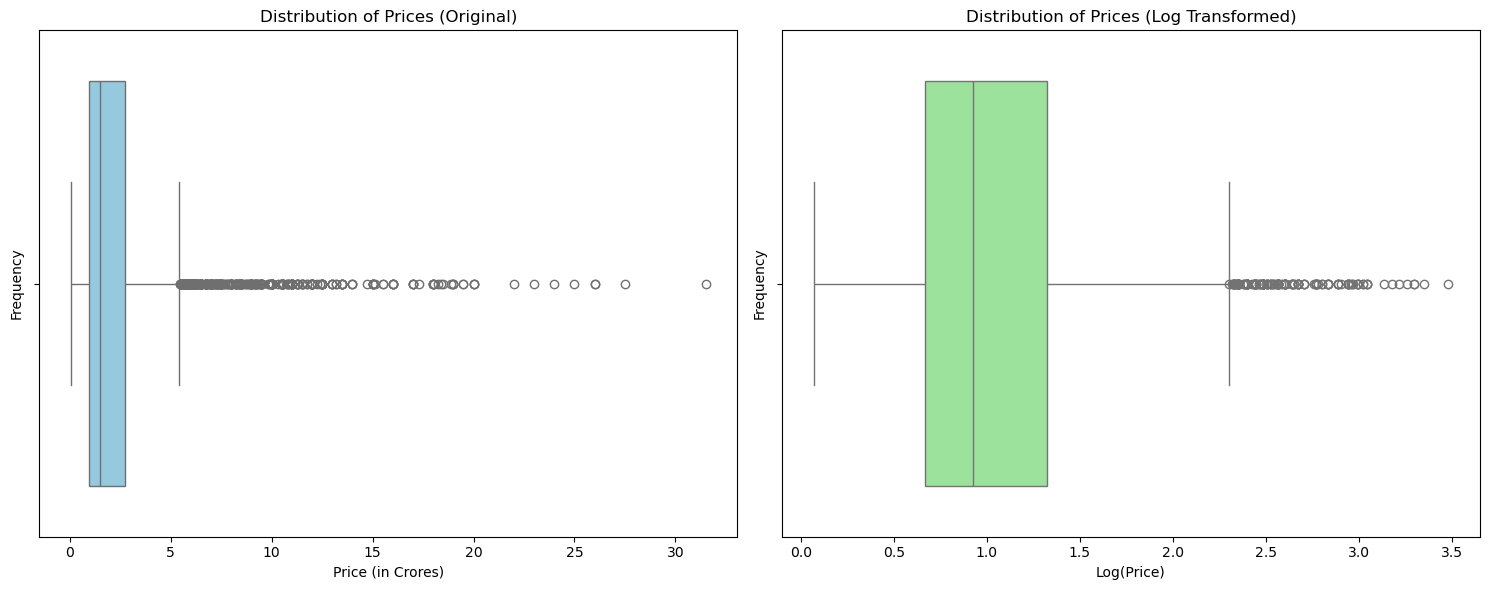

In [32]:

plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x = df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x = np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Observation
* after doing binning found out most the property price is around 2-3 cr and below. after 5cr there is a drastic down
* log value is helping in Normalize the distribution but only log will result in -ve value since price can't be -v so take log1p
  

## price_per_sqft

In [33]:
df['price_per_sqft'].describe()

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

In [34]:
df['price_per_sqft'].isnull().sum()

17

<Axes: xlabel='price_per_sqft', ylabel='Count'>

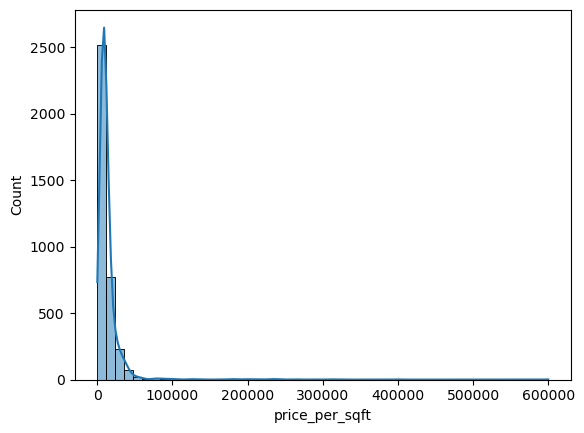

In [35]:
sns.histplot(df['price_per_sqft'], kde=True, bins=50)

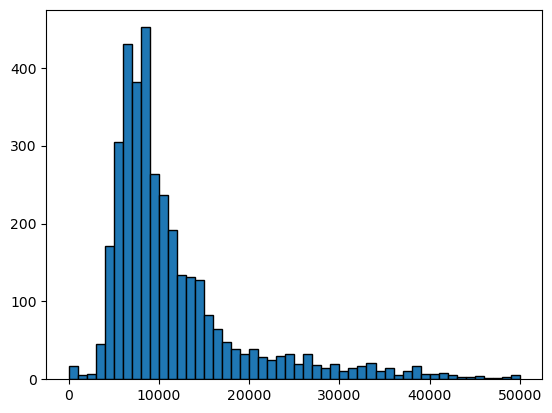

In [36]:
plt.hist(df['price_per_sqft'], bins=50, range=(0, 50000), edgecolor='black')
plt.show()

<Axes: xlabel='price_per_sqft'>

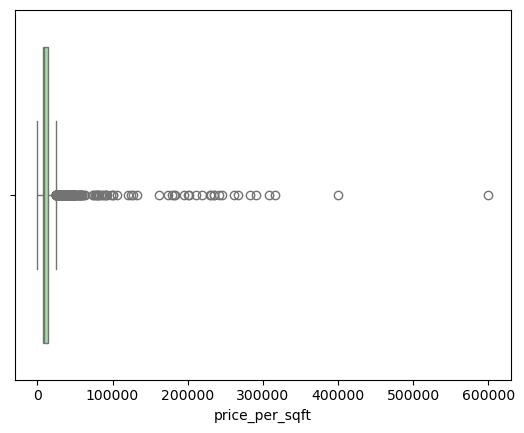

In [37]:
sns.boxplot(x = df['price_per_sqft'], color = "lightgreen")

Observation
* there is 17b missing value
* surprisingly the minimum price is 4 rupees and median is 9020 which is good
* so many outliers
* maximum price ranges from 0 to 20,000

## bedroom

In [38]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

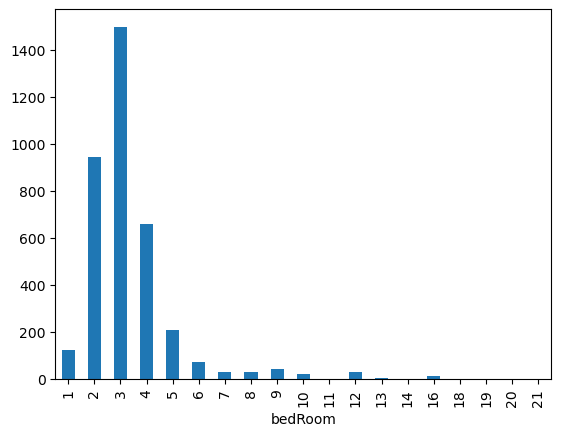

In [39]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

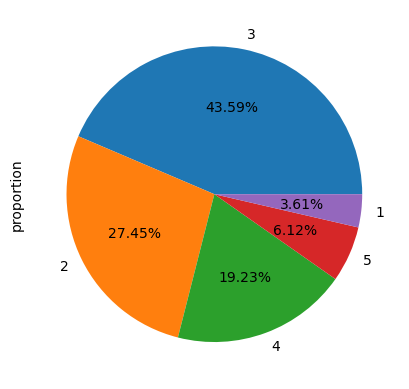

In [40]:
df['bedRoom'].value_counts(normalize=True).head(5).plot(kind='pie',autopct='%0.2f%%')

Observation
* maximum property has 2,3 bedroom and there is one property with 16 bedroom
* there is no missing value

## bathroom

In [41]:
df['bathroom'].isnull().sum()

0

In [42]:
df['bathroom'].value_counts()

bathroom
3     1077
2     1047
4      820
5      294
1      156
6      117
9       41
7       40
8       25
12      22
10       9
16       8
18       4
11       4
13       4
20       3
17       3
14       2
21       1
Name: count, dtype: int64

<Axes: xlabel='bathroom'>

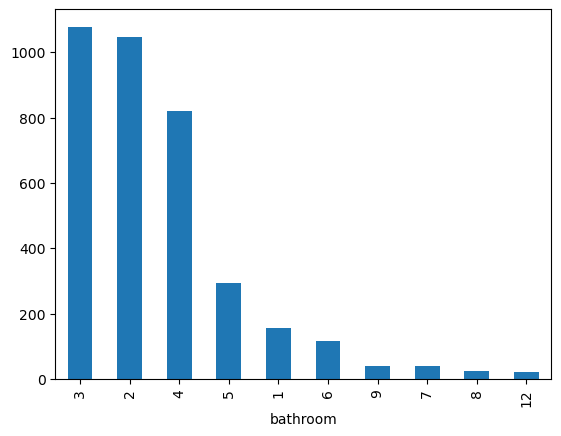

In [43]:
df['bathroom'].value_counts().head(10).plot(kind="bar")

<Axes: ylabel='proportion'>

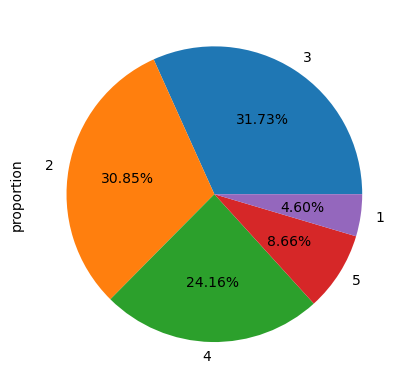

In [44]:
df['bathroom'].value_counts(normalize=True).head(5).plot(kind='pie',autopct='%0.2f%%')

Observation
* same as bedroom

## balcony

In [45]:
df['balcony'].isnull().sum()

0

In [46]:
df['balcony'].value_counts()

balcony
3+    1172
3     1074
2      884
1      365
0      182
Name: count, dtype: int64

<Axes: xlabel='balcony'>

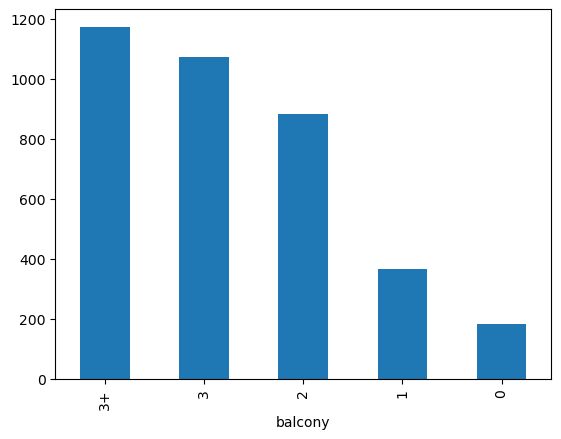

In [47]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

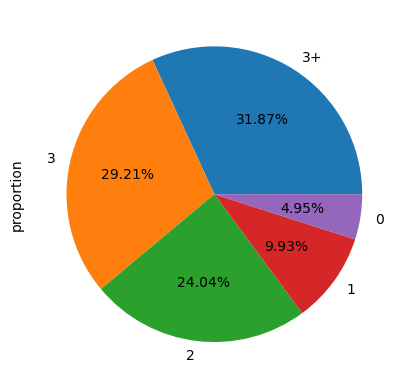

In [48]:
df['balcony'].value_counts(normalize=True).plot(kind='pie',autopct='%0.2f%%')

Observation
* there is no missing value
* there is 3+ balcony

In [49]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ardee city,sector 52,1.55,7381.0,2100.0,Built Up area: 2100 (195.1 sq.m.)Carpet area: ...,4,4,3,1.0,NaN,Moderately Old,NaN,2100.0,1600.0,0,0,0,0,0,1,0
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,10.0,NaN,Relatively New,NaN,NaN,520.0,0,0,0,0,0,1,15
2,flat,mvn athens,sohna road,0.26,5397.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2,2,1,5.0,NaN,Relatively New,NaN,NaN,482.0,0,0,0,0,0,1,95
3,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3,5,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,0,1,0,0,0,1,72
4,flat,parsvnath exotica,sector 53,4.80,16580.0,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up...,3,4,3+,8.0,North-East,Relatively New,2895.0,2500.0,2200.0,0,1,0,1,1,2,174


## floor number

In [50]:
df['floorNum'].isnull().sum()

19

In [51]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

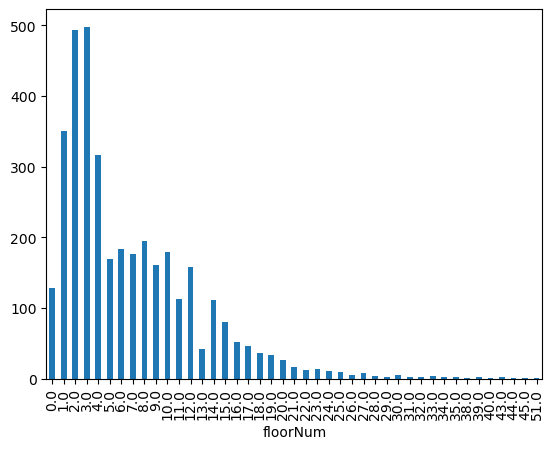

In [52]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

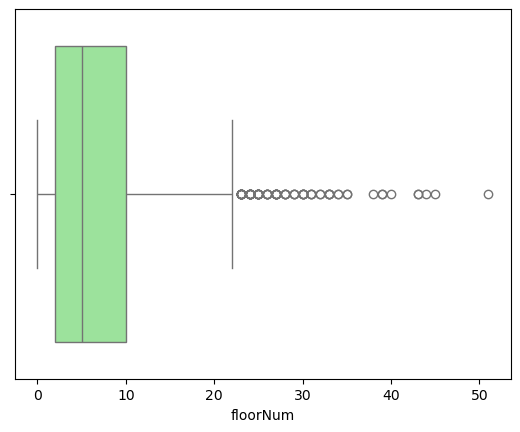

In [53]:
sns.boxplot(x = df['floorNum'], color='lightgreen')

In [55]:
df[df['floorNum'] >40]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
939,flat,m3m heights,sector 65,2.86,14000.0,2043.0,Carpet area: 2040 (189.52 sq.m.),3,3,3,45.0,East,Under Construction,NaN,NaN,2040.0,0,1,0,0,0,1,48
1038,house,ireo victory valley,sector 67,8.00,22222.0,3600.0,Plot area 400(334.45 sq.m.),6,7,3+,51.0,North-East,Moderately Old,NaN,3600.0,NaN,1,1,0,1,0,2,49
1719,flat,m3m skycity,sector 65,2.10,16030.0,1310.0,Super Built up area 1310(121.7 sq.m.),2,2,2,43.0,NaN,New Property,1310.0,NaN,NaN,0,0,0,0,0,1,127
1783,flat,m3m heights,sector 65,2.78,15200.0,1829.0,Super Built up area 1828(169.83 sq.m.),3,3,3,44.0,NaN,Undefined,1828.0,NaN,NaN,0,0,0,0,0,1,56
3369,flat,m3m skycity,sector 65,2.85,15590.0,1828.0,Super Built up area 1828(169.83 sq.m.),3,3,3,43.0,South,Under Construction,1828.0,NaN,NaN,0,0,0,0,0,1,115


Observation
* there is 50% property bwteen 0-5th floor.
* floor 2nd and 3rd are preety common
* The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
* there are few property with higher floor > 25

## facing

In [56]:
df['facing'].isnull().sum()

1045

In [57]:
df['facing'].fillna('NA',inplace=True)

C:\Users\KIIT01\AppData\Local\Temp\ipykernel_13644\3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [58]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

Observation
* there is a lot of missing values
* facing can be used to check the price if specific direction facing property has higher price or not 

## agePosession

In [59]:
df['agePossession'].isnull().sum()

0

In [60]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

<Axes: xlabel='agePossession'>

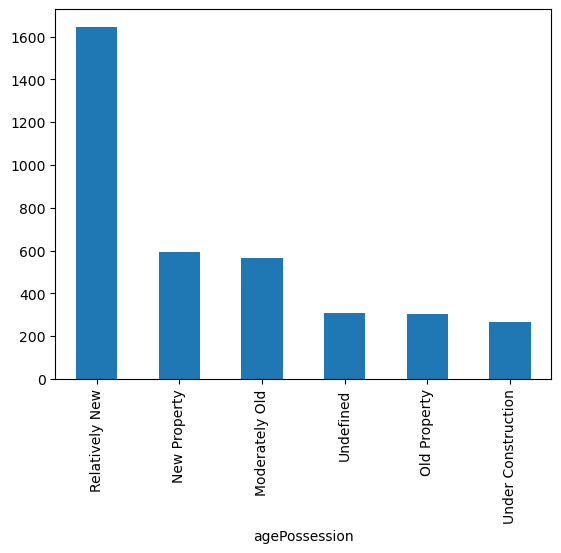

In [62]:
df['agePossession'].value_counts().plot(kind="bar")

Observation
* there is no null value.
* most of property are newly built

## super built up area

In [63]:
df['super_built_up_area'].isnull().sum()

1802

In [64]:
df['super_built_up_area'].describe()

count     1875.00000
mean      1925.23680
std        764.17275
min         89.00000
25%       1479.50000
50%       1828.00000
75%       2215.00000
max      10000.00000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

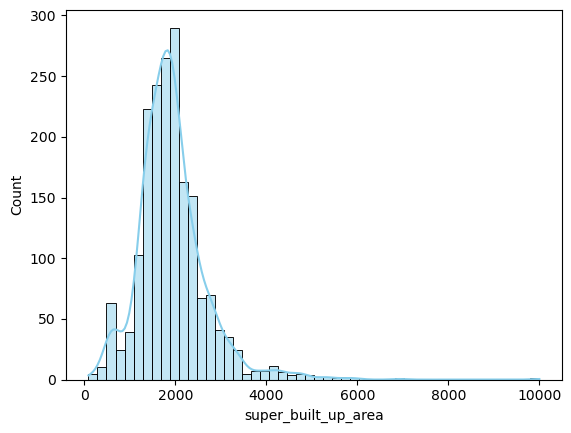

In [65]:
sns.histplot(df['super_built_up_area'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

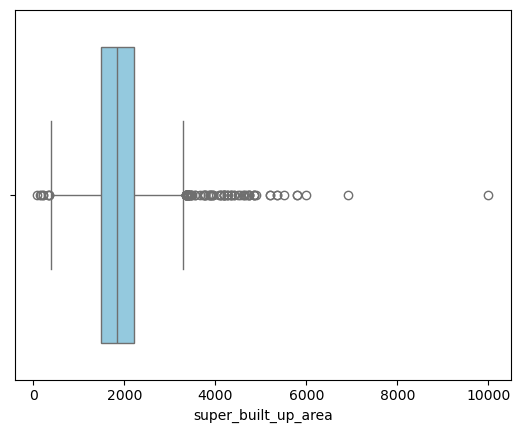

In [66]:
sns.boxplot(x = df['super_built_up_area'], color='skyblue')

Observation
* Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
* There are a few properties with a significantly larger area, leading to a right-skewed distribution.
* The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
* There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

## built up area

In [67]:
df['built_up_area'].isnull().sum()

1987

In [68]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585018
std       17942.880201
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

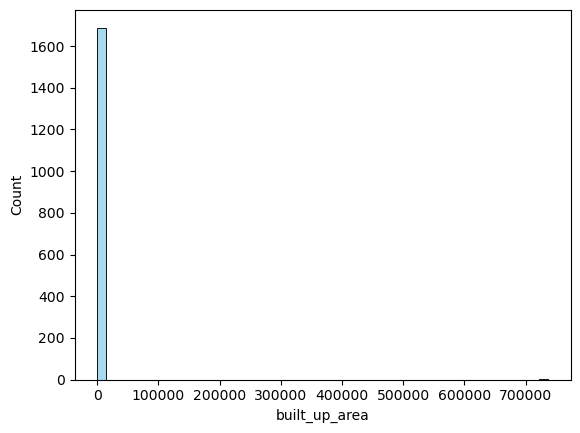

In [69]:
sns.histplot(df['built_up_area'], bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

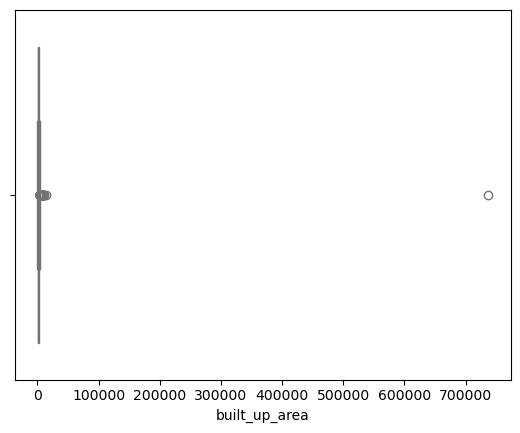

In [71]:
sns.boxplot(x = df['built_up_area'], color='lightgreen')

## Carpet area

In [72]:
df['carpet_area'].isnull().sum()

1805

In [73]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.181902
std       22799.836285
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

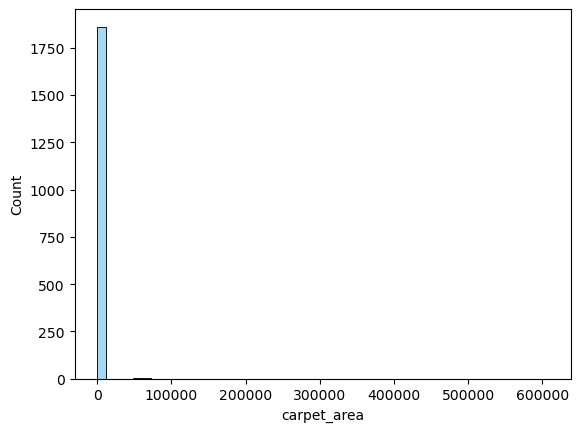

In [74]:
sns.histplot(df['carpet_area'], bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

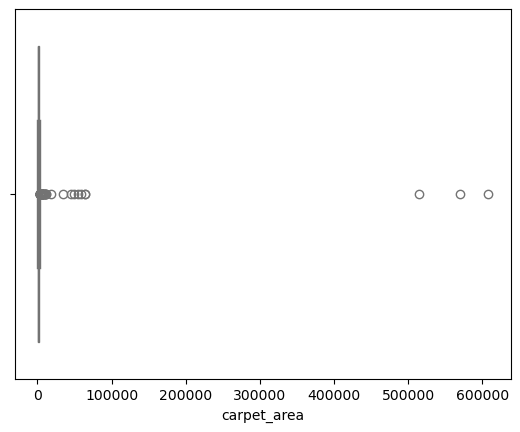

In [75]:
sns.boxplot(x = df['carpet_area'], color='lightgreen')

Observation
* Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.* 
There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution
* 
The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outlier
* .
The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [76]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ardee city,sector 52,1.55,7381.0,2100.0,Built Up area: 2100 (195.1 sq.m.)Carpet area: ...,4,4,3,1.0,NA,Moderately Old,NaN,2100.0,1600.0,0,0,0,0,0,1,0
1,flat,pyramid urban homes 2,sector 86,0.50,9615.0,520.0,Carpet area: 520 (48.31 sq.m.),2,2,1,10.0,NA,Relatively New,NaN,NaN,520.0,0,0,0,0,0,1,15
2,flat,mvn athens,sohna road,0.26,5397.0,482.0,Carpet area: 481.73 (44.75 sq.m.),2,2,1,5.0,NA,Relatively New,NaN,NaN,482.0,0,0,0,0,0,1,95
3,flat,experion windchants,sector 112,3.65,11428.0,3194.0,Built Up area: 2800 (260.13 sq.m.),3,5,2,3.0,South-West,Relatively New,NaN,2800.0,NaN,0,1,0,0,0,1,72
4,flat,parsvnath exotica,sector 53,4.80,16580.0,2895.0,Super Built up area 2895(268.95 sq.m.)Built Up...,3,4,3+,8.0,North-East,Relatively New,2895.0,2500.0,2200.0,0,1,0,1,1,2,174


## additional room

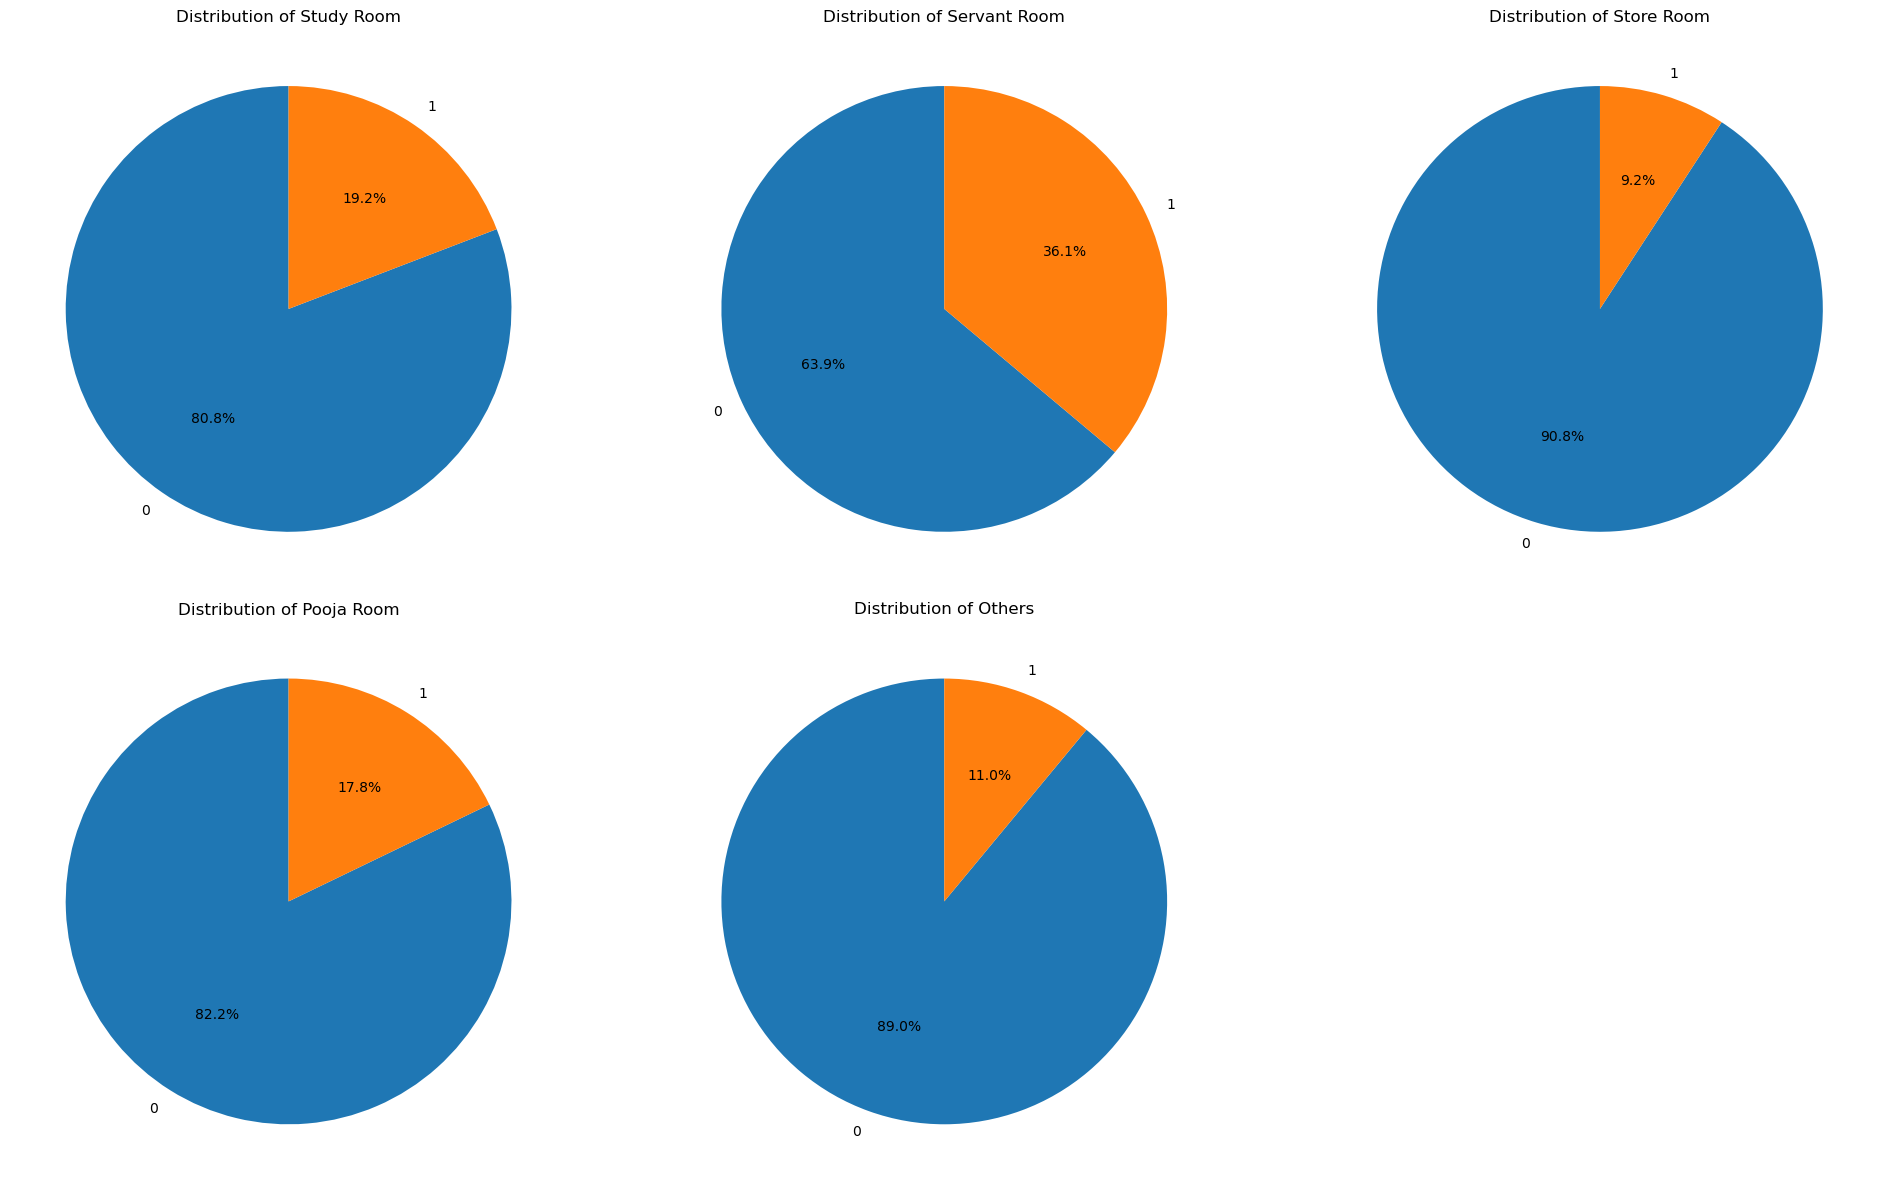

In [80]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type and 1 will start index from 1 instead of 0
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

## furnishing type

In [81]:
df['furnishing_type'].value_counts()

furnishing_type
1    2436
2    1038
0     203
Name: count, dtype: int64

<Axes: ylabel='count'>

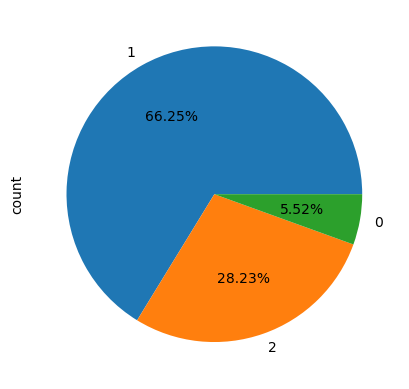

In [82]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

<Axes: xlabel='furnishing_type'>

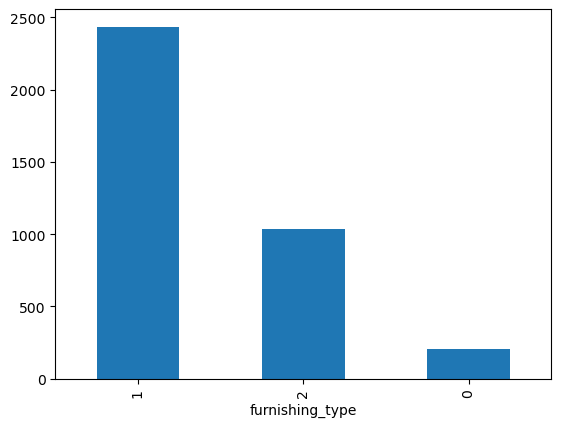

In [83]:
df['furnishing_type'].value_counts().plot(kind='bar')

Observation
* most property are frunished

## luxury score

In [84]:
df['luxury_score'].isnull().sum()

0

In [85]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

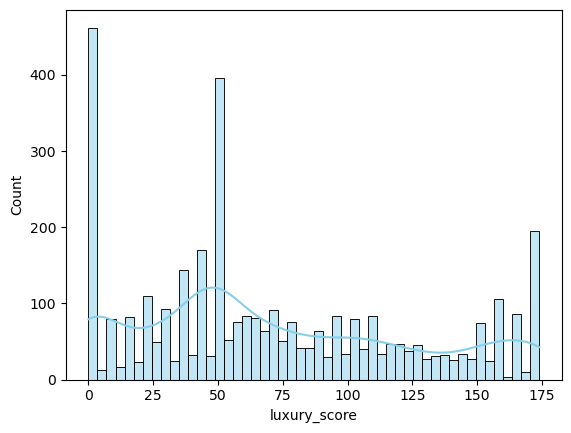

In [86]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='luxury_score'>

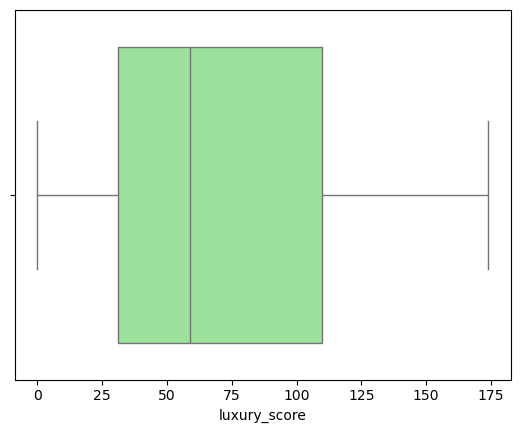

In [88]:
sns.boxplot(x = df['luxury_score'], color='lightgreen')

# Pandas profilling

In [ ]:
# Create the ProfileReport object
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# Generate the report
profile.to_file("output_report.html")